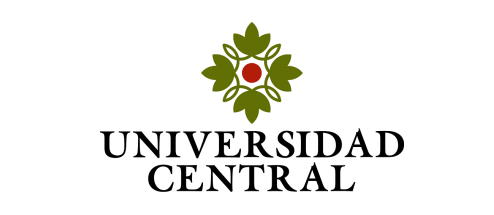

# Transfer learning

In [2]:
import os, shutil
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import sys
import numpy as np
import itertools
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_recall_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
import pandas as pd
from pylab import *
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
print(tf.__version__)
%matplotlib inline

2.10.0


In [143]:
# Funcion para graficar los resultados de los modelos 
def grafica(H):
    plt.figure(figsize=(16,10))  
    plt.subplot(2,2,1)
    plt.plot(H.history['acc'],'r', label='accuracy') 
    plt.plot(H.history['val_acc'],label='val_accuracy')  
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Accuracy")  
    plt.title("Training Accuracy")  
    plt.legend(loc="lower right")
    
    plt.subplot(2,2,2) 
    plt.plot(H.history['loss'],'r',label='loss') 
    plt.plot(H.history['val_loss'],label='val_loss') 
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Loss")  
    plt.title("Training Loss")  
    plt.legend(loc="upper right")
    
    plt.subplot(2,2,3) 
    plt.plot(H.history['precision_3'],'r',label='precision') 
    plt.plot(H.history['val_precision_3'],label='val_precision')
    plt.rcParams['figure.figsize'] = (4, 3)  
    plt.xlabel("Num of Epochs")  
    plt.ylabel("Loss")  
    plt.title("Training Loss")  
    plt.legend(loc="lower right")
    
    
    plt.show()  
    return

In [83]:
# Función para extraer carateristicas
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [113]:
def matriz_confusion(cm, classes, normalize=False,
                            title='Matriz de Confusión', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,fontsize=16)
    plt.yticks(tick_marks, classes,rotation=0,fontsize=16)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=14)
    plt.ylabel('Etiqueta real')
    plt.xlabel('Etiqueta predicha')
    plt.tight_layout()

In [ ]:
path="C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset/Dataset_separado"
LABELS = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","1",
         "2","3","4","5","6","7","8","9","10","Amor","Ayudar","Aeropuerto","Banco",
         "Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Trasmilenio"]
for i in LABELS:
    datos=os.path.join(path, i)
    os.mkdir(datos)

In [ ]:
"1",
         "2","3","4","5","6","7","8","9","10","Amor","Ayudar","Aeropuerto","Banco",
         "Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Trasmilenio"

In [ ]:
ImgLocation=r"C:\Users\ssant\Escritorio\Maestria\Tesis/Dataset\Dataset_Fin"
directorio_n=r"C:\Users\ssant\Escritorio\Maestria\Tesis\Dataset\Dataset_separado"
LABELS = ["Amor","Ayudar","Aeropuerto","Banco","Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Trasmilenio"]

original_dataset_dir = ImgLocation
pngfiles = list(filter(lambda f: f.endswith('.png') or f.endswith('.jpg'), list(os.listdir(original_dataset_dir))))
for clase in LABELS:
    i=0
    while i<42321:
        if pngfiles[i][:2]==clase[:2]:          
            src = os.path.join(original_dataset_dir, pngfiles[i])
            dst = os.path.join(os.path.join(directorio_n, clase), pngfiles[i])
            shutil.copyfile(src, dst)  
        i=i+1   

In [7]:
# Ubicación de las imagenes
ImgLocation="C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset/Dataset_separado/"
# Etiquetas
LABELS = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","1",
         "2","3","4","5","6","7","8","9","10","Amor","Ayudar","Aeropuerto","Banco",
         "Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Trasmilenio"]
ImagePaths=[]
ListLabels=[]
for label in LABELS:
    for image in list(os.listdir(ImgLocation+label)):
        ImagePaths=ImagePaths+[ImgLocation+label+"/"+image]
        ListLabels=ListLabels+[label]

In [6]:
#Función para ver el resumen de los modelos preentrenados
def resumen(model=None):
    header = '{:4} {:16} {:24} {:24} {:10}'.format('#', 'Layer Name','Layer Input Shape','Layer Output Shape','Parameters'
    )
    print('='*(len(header)))
    print(header)
    print('='*(len(header)))
    count=0
    count_trainable=0
    for i, layer in enumerate(model.layers):
        count_trainable += layer.count_params() if layer.trainable else 0
        input_shape = '{}'.format(layer.input_shape)
        output_shape = '{}'.format(layer.output_shape)
        str = '{:<4d} {:16} {:24} {:24} {:10}'.format(i,layer.name, input_shape, output_shape, layer.count_params())
        print(str)
        count += layer.count_params()
    print('_'*(len(header)))
    print('Total Parameters : ', count)
    print('Total Trainable Parameters : ', count_trainable)
    print('Total No-Trainable Parameters : ', count-count_trainable)

In [58]:
# La ruta al directorio donde el conjunto original de datos
base_dir = 'C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset'
#os.mkdir(base_dir)
LABELS = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","1",
         "2","3","4","5","6","7","8","9","10","Amor","Ayudar","Aeropuerto","Banco",
         "Doler","Hospital","Jugar","Mostrar","Recordar","Sano","Trasmilenio"]
# Directorios para nuestras divisiones de validación y prueba
train_dir_10 = os.path.join(base_dir, 'train')
os.mkdir(train_dir_10)
validation_dir_10 = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir_10)
test_dir_10 = os.path.join(base_dir, 'test')
os.mkdir(test_dir_10)

for label in LABELS:
    os.mkdir(os.path.join(train_dir_10, label))
    os.mkdir(os.path.join(validation_dir_10, label))
    os.mkdir(os.path.join(test_dir_10, label))
    

In [56]:
import random 
def mezclar_lista(lista_original):
    # Crear una copia, ya que no deberíamos modificar la original
    # https://parzibyte.me/blog/2020/05/31/python-clonar-lista-eliminar-referencia/
    lista = lista_original[:]
    # Ciclo for desde 0 hasta la longitud de la lista -1
    longitud_lista = len(lista)
    for i in range(longitud_lista):
        # Obtener un índice aleatorio
        # https://parzibyte.me/blog/2019/04/04/generar-numero-aleatorio-rango-python/
        indice_aleatorio = random.randint(0, longitud_lista - 1)
        # Intercambiar
        temporal = lista[i]
        lista[i] = lista[indice_aleatorio]
        lista[indice_aleatorio] = temporal
    # Regresarla
    return lista

In [57]:
ImgLocation="C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset/Dataset_separado/"
mezclar_lista(list(os.listdir(ImgLocation+label)))

['Transmilenio_453.jpg',
 'Transmilenio_431.jpg',
 'Transmilenio_793.jpg',
 'Transmilenio_508.jpg',
 'Transmilenio_430.jpg',
 'Transmilenio_859.jpg',
 'Transmilenio_94.jpg',
 'Transmilenio_420.jpg',
 'Transmilenio_629.jpg',
 'Transmilenio_95.jpg',
 'Transmilenio_570.jpg',
 'Transmilenio_524.jpg',
 'Transmilenio_761.jpg',
 'Transmilenio_175.jpg',
 'Transmilenio_515.jpg',
 'Transmilenio_367.jpg',
 'Transmilenio_876.jpg',
 'Transmilenio_69.jpg',
 'Transmilenio_215.jpg',
 'Transmilenio_347.jpg',
 'Transmilenio_475.jpg',
 'Transmilenio_408.jpg',
 'Transmilenio_501.jpg',
 'Transmilenio_414.jpg',
 'Transmilenio_219.jpg',
 'Transmilenio_442.jpg',
 'Transmilenio_837.jpg',
 'Transmilenio_124.jpg',
 'Transmilenio_324.jpg',
 'Transmilenio_455.jpg',
 'Transmilenio_106.jpg',
 'Transmilenio_172.jpg',
 'Transmilenio_759.jpg',
 'Transmilenio_188.jpg',
 'Transmilenio_183.jpg',
 'Transmilenio_417.jpg',
 'Transmilenio_487.jpg',
 'Transmilenio_154.jpg',
 'Transmilenio_81.jpg',
 'Transmilenio_274.jpg',
 'Tr

In [59]:
ImgLocation="C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset/Dataset_separado/"
for label in LABELS:
    initial_count = 0
    for imagen in mezclar_lista(list(os.listdir(ImgLocation+label))):
        if initial_count<=900:
            if initial_count< 540:
                src = os.path.join(ImgLocation+label, imagen)
                dst = os.path.join(os.path.join(train_dir_10, label), imagen)
                shutil.copyfile(src, dst)
                initial_count += 1
            elif initial_count>= 540 and initial_count< 720:
                src = os.path.join(ImgLocation+label, imagen)
                dst = os.path.join(os.path.join(validation_dir_10, label), imagen)
                shutil.copyfile(src, dst)
                initial_count += 1
            else:
                src = os.path.join(ImgLocation+label, imagen)
                dst = os.path.join(os.path.join(test_dir_10, label), imagen)
                shutil.copyfile(src, dst)
                initial_count += 1

In [60]:
# Todas las imágenes serán reescaladas por 1./255
base_dir = 'C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset'
train_datagen_10 = ImageDataGenerator(rescale=1./255)
test_datagen_10 = ImageDataGenerator(rescale=1./255)
validation_datagen_10 = ImageDataGenerator(rescale=1./255)
train_dir_10=base_dir+'/train'
validation_dir_10=base_dir+'/validation'
test_dir_10=base_dir+'/test'
train_generator_10 = train_datagen_10.flow_from_directory(
        # Este es el directorio de destino
        train_dir_10,
        # Todas las imágenes cambiarán de tamaño a 150 x 150.
        target_size=(150, 150),
        batch_size=20,
        # Dado que usamos la pérdida binary_crossentropy, necesitamos etiquetas binarias
        class_mode='categorical')

validation_generator_10 = validation_datagen_10.flow_from_directory(
        validation_dir_10,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator_10 = test_datagen_10.flow_from_directory(
        test_dir_10,
        target_size=(150, 150),
        batch_size=20,
        shuffle=False,
        class_mode='categorical')

Found 25380 images belonging to 47 classes.
Found 8460 images belonging to 47 classes.
Found 8481 images belonging to 47 classes.


# Separdo

In [61]:
conv_base=tf.keras.applications.MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [109]:
from keras.applications.vgg16 import VGG16, preprocess_input
conv_base=VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=(150, 150, 3))

In [69]:

cellsize =3
activation ='relu'# 'tanh'
steps_epoch = 100

conv_base = models.Sequential()
conv_base.add(layers.Conv2D(32, (cellsize, cellsize), activation=activation, input_shape=(150, 150, 3)))
conv_base.add(layers.MaxPooling2D((2, 2)))
conv_base.add(layers.Conv2D(64, (cellsize, cellsize), activation=activation))
conv_base.add(layers.MaxPooling2D((2, 2)))
conv_base.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
conv_base.add(layers.MaxPooling2D((2, 2)))
conv_base.add(layers.Conv2D(128, (cellsize, cellsize), activation=activation))
conv_base.add(layers.MaxPooling2D((2, 2)))

In [110]:
base=pd.DataFrame()
base["layer name"]=[conv_base.layers[i].name for i in range(0,len(conv_base.layers))]
base["input_shape"]=[conv_base.layers[i].input_shape for i in range(0,len(conv_base.layers))]
base["output_shape"]=[conv_base.layers[i].output_shape for i in range(0,len(conv_base.layers))]
base["Parmas"]=[conv_base.layers[i].count_params() for i in range(0,len(conv_base.layers))]
base

,layer name,input_shape,output_shape,Parmas
0,input_6,"[(None, 150, 150, 3)]","[(None, 150, 150, 3)]",0
1,block1_conv1,"(None, 150, 150, 3)","(None, 150, 150, 64)",1792
2,block1_conv2,"(None, 150, 150, 64)","(None, 150, 150, 64)",36928
3,block1_pool,"(None, 150, 150, 64)","(None, 75, 75, 64)",0
4,block2_conv1,"(None, 75, 75, 64)","(None, 75, 75, 128)",73856
5,block2_conv2,"(None, 75, 75, 128)","(None, 75, 75, 128)",147584
6,block2_pool,"(None, 75, 75, 128)","(None, 37, 37, 128)",0
7,block3_conv1,"(None, 37, 37, 128)","(None, 37, 37, 256)",295168
8,block3_conv2,"(None, 37, 37, 256)","(None, 37, 37, 256)",590080
9,block3_conv3,"(None, 37, 37, 256)","(None, 37, 37, 256)",590080


In [94]:
inicio = time.time()
train_features, train_labels = extract_features(train_dir_10, 540*47)
fin = time.time()
print("Tiempo en segundos entrenando: ", fin-inicio)
inicio = time.time()
validation_features, validation_labels = extract_features(validation_dir_10, 180*47)
fin = time.time()
print("Tiempo en segundos entrenando: ", fin-inicio) 
inicio = time.time()
test_features, test_labels = extract_features(test_dir_10, 180*47)
fin = time.time()
print("Tiempo en segundos entrenando: ", fin-inicio)

Found 25380 images belonging to 47 classes.
1/1 [==============================] - 0s 454ms/step


1/1 [==============================] - 1s 553ms/step


1/1 [==============================] - 0s 474ms/step


1/1 [==============================] - 0s 461ms/step


1/1 [==============================] - 1s 546ms/step


1/1 [==============================] - 0s 373ms/step


1/1 [==============================] - 1s 523ms/step


1/1 [==============================] - 0s 491ms/step


1/1 [==============================] - 1s 507ms/step
Tiempo en segundos entrenando:  3199.174317598343
Found 8460 images belonging to 47 classes.
1/1 [==============================] - 0s 462ms/step


1/1 [==============================] - 0s 425ms/step


1/1 [==============================] - 0s 457ms/step
Tiempo en segundos entrenando:  581.4286122322083
Found 8481 images belonging to 47 classes.


1/1 [==============================] - 1s 563ms/step


1/1 [==============================] - 1s 545ms/step


1/1 [==============================] - 1s 545ms/step
Tiempo en segundos entrenando:  1500.8847298622131


In [95]:
train_features = np.reshape(train_features, (540*47, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (180*47, 4 * 4 * 512))
test_features = np.reshape(test_features, (180*47, 4 * 4 * 512))

In [125]:
model_separado = models.Sequential()
model_separado.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
#model_separado.add(layers.Dropout(0.2)) ###usando dropout
model_separado.add(layers.Dense(256, activation='relu'))
model_separado.add(layers.Dense(47, activation='softmax'))
model_separado.summary()
model_separado.compile(loss='categorical_crossentropy',
                      metrics=['acc',tf.keras.metrics.Precision()],
                      optimizer='rmsprop')
inicio = time.time()
h_model_separado = model_separado.fit(train_features, to_categorical(train_labels),
                    epochs=10,
                    validation_data=(validation_features, to_categorical(validation_labels)),shuffle=True)
fin = time.time()
print("Tiempo en segundos entrenando: ", fin-inicio) 

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 512)               4194816   
                                                                 
 dense_64 (Dense)            (None, 256)               131328    
                                                                 
 dense_65 (Dense)            (None, 47)                12079     
                                                                 
Total params: 4,338,223
Trainable params: 4,338,223
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
794/794 [==============================] - 32s 39ms/step - loss: 0.9922 - acc: 0.7218 - precision_3: 0.9067 - val_loss: 0.8004 - val_acc: 0.8033 - val_precision_3: 0.8386
Epoch 2/10
794/794 [==============================] - 29s 37ms/step - loss: 0.2100 - acc: 0.9339 - precision_3: 0.9514 - val_

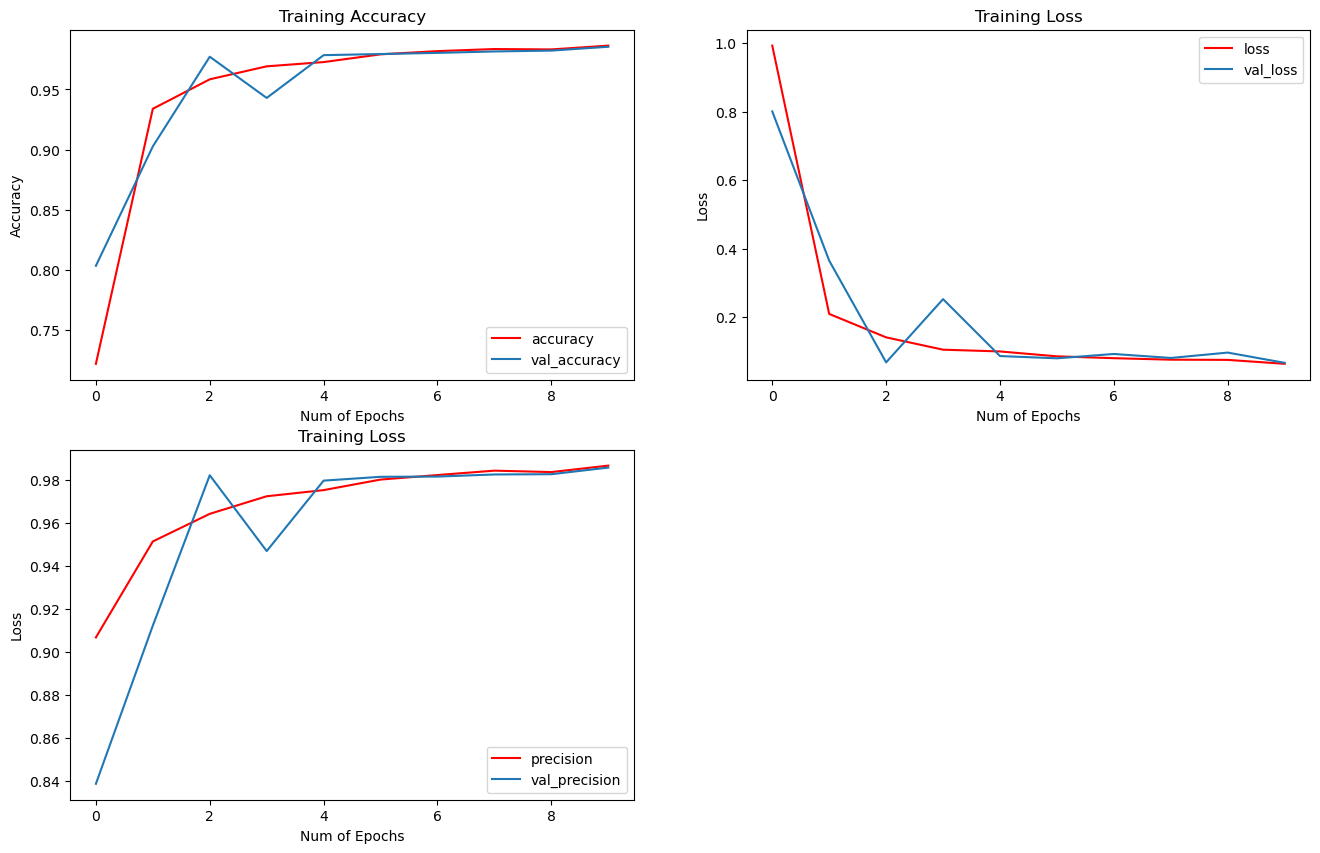

In [144]:
grafica(h_model_separado)

In [146]:
test_loss, test_acc, test_pres = model_separado.evaluate(test_features, to_categorical(test_labels))
print('')
print('test_loss:', test_loss)
print('')
print('test_acc:', test_acc)
print('')
print('test_precision:', test_pres)

265/265 [==============================] - 2s 6ms/step - loss: 0.0686 - acc: 0.9864 - precision_3: 0.9870

test_loss: 0.06861192733049393

test_acc: 0.9864066243171692

test_precision: 0.9869868755340576


265/265 [==============================] - 2s 7ms/step


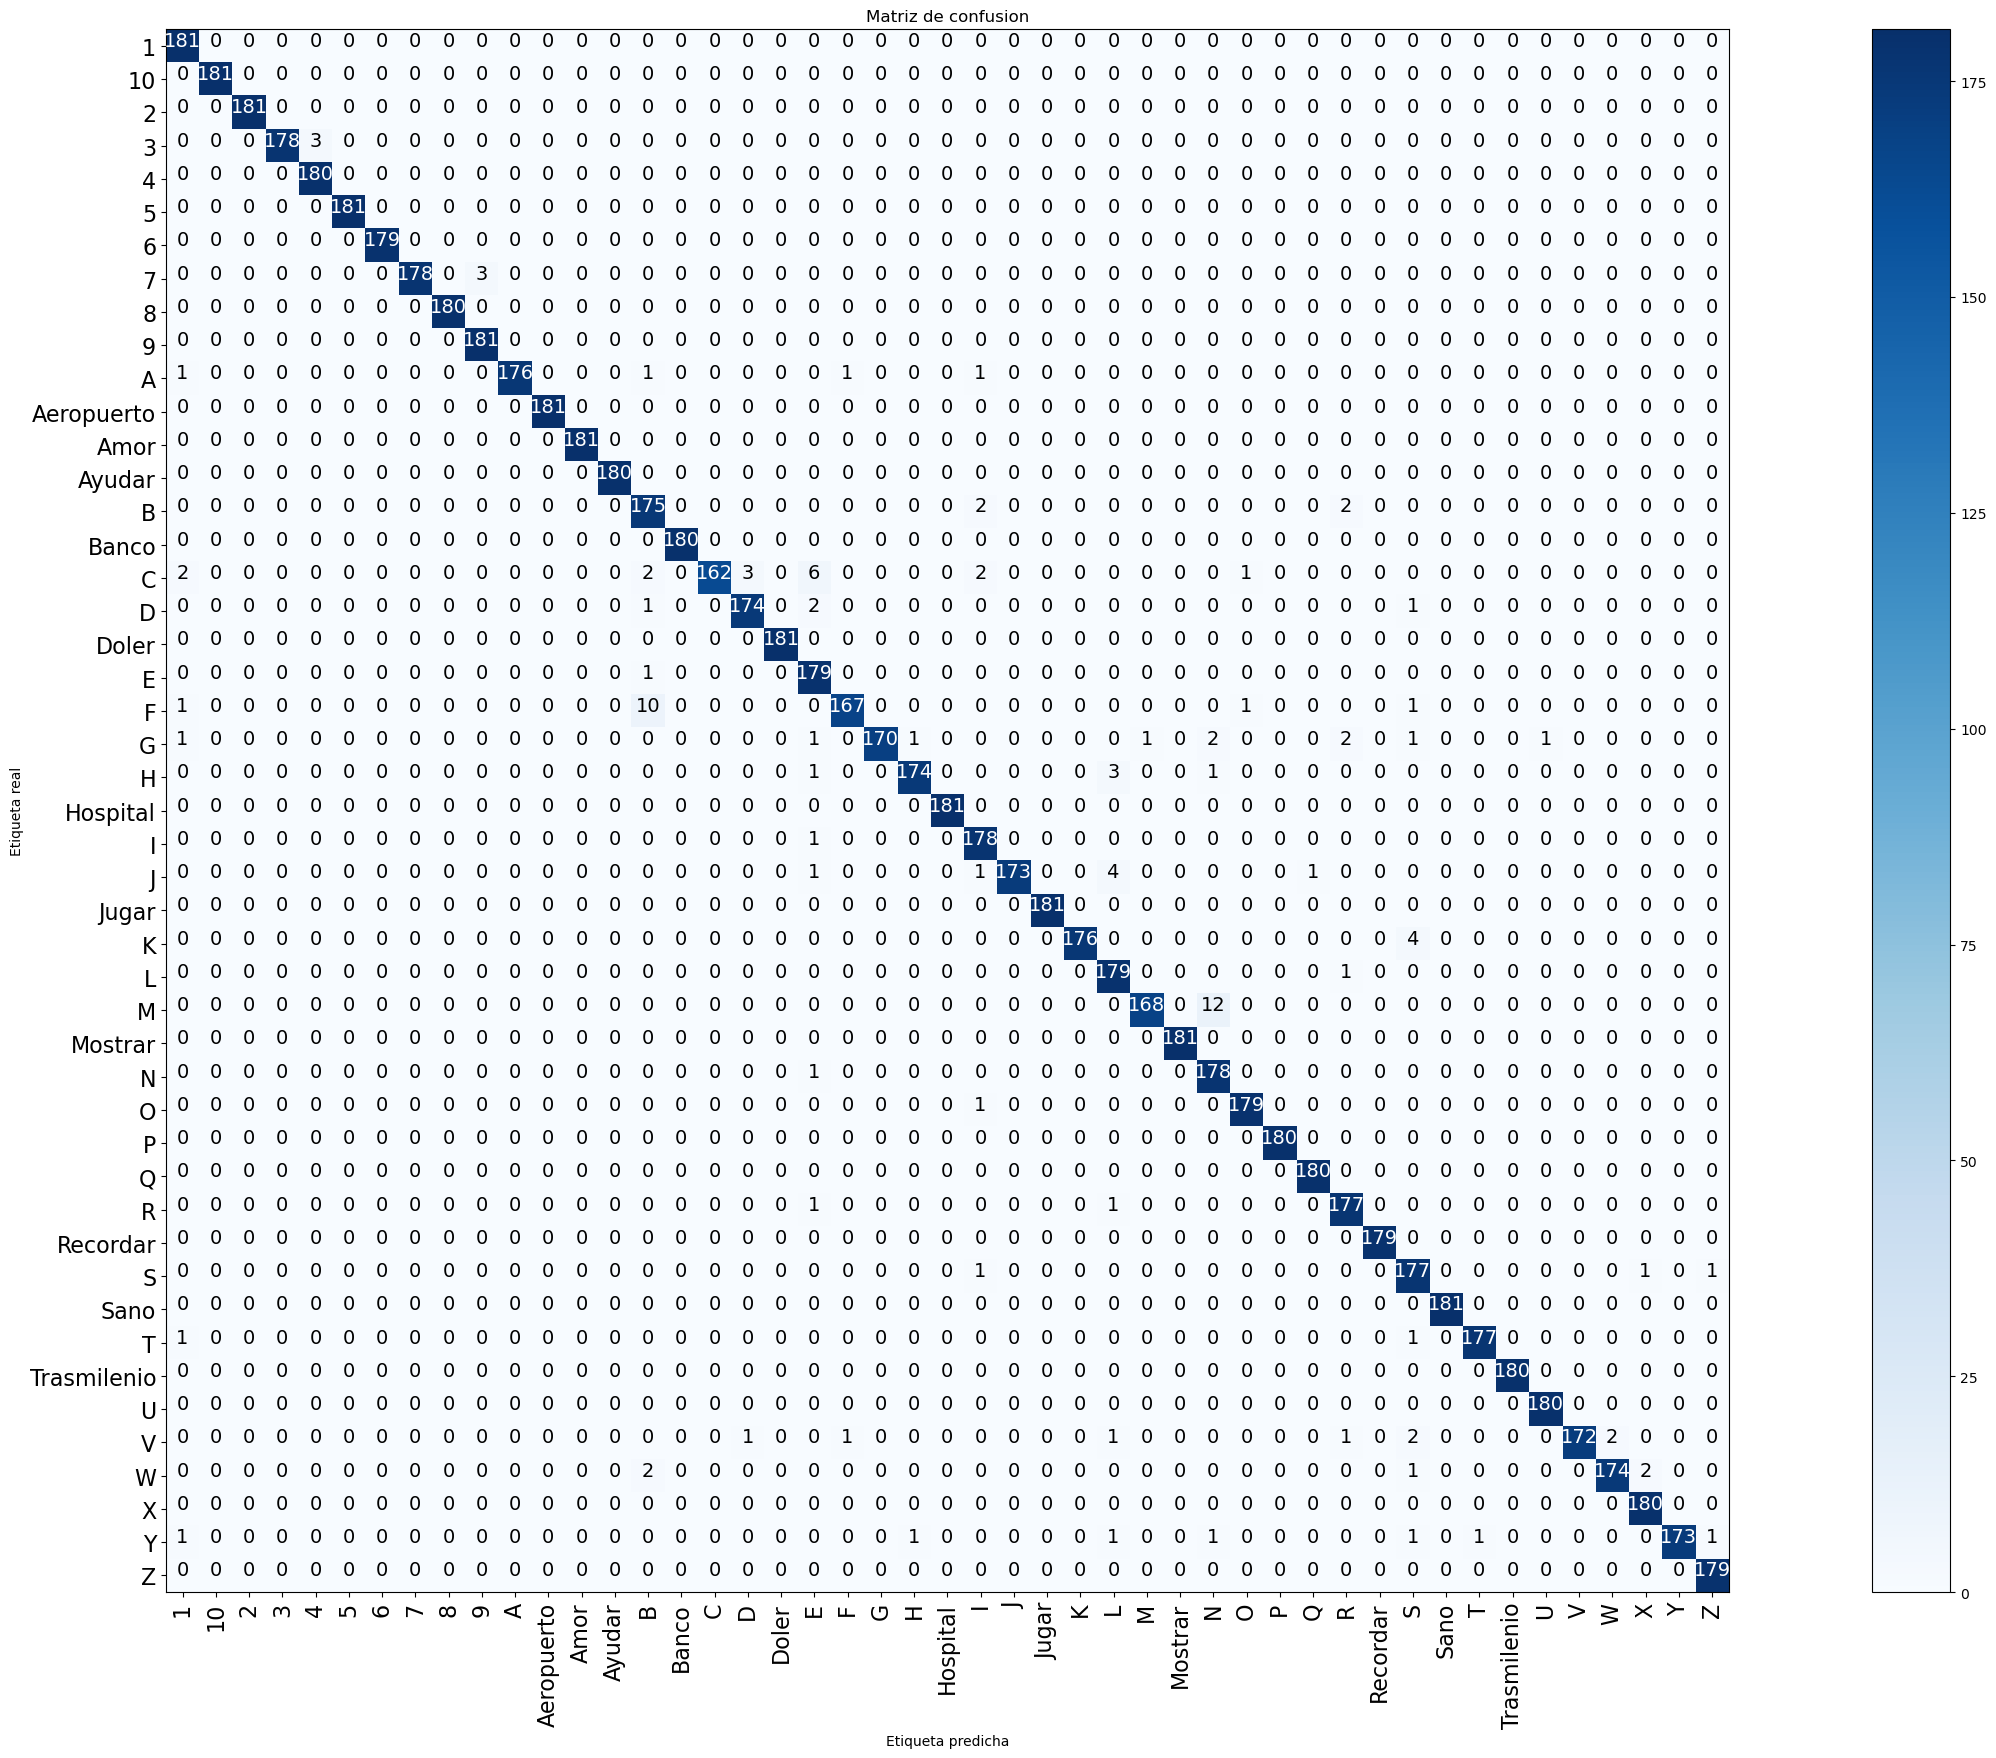

In [130]:
predictions = (model_separado.predict(test_features)> 0.5).astype("int32")
cnf_matrix = confusion_matrix(to_categorical(test_labels).argmax(axis=1), predictions.argmax(axis=1),
                              labels=[i for i in list(test_generator_10.class_indices.values())])
np.set_printoptions(precision=2)
plt.figure()
class_names = [i for i in list(test_generator_10.class_indices.keys())]
matriz_confusion(cnf_matrix,
                        classes=class_names,
                        title='Matriz de confusion')
a = plt.gcf()
a.set_size_inches(50,50)
plt.show()

In [131]:
model_separado.save("C:/Users/ssant/Escritorio/Maestria/Tesis/Dataset/"+"modeloTL" + '.h5')